In [ ]:

import numpy as np
import pandas as pd

df = pd.read_csv("Insurance.csv")
df

/content/drive/MyDrive/Colab Notebooks/Insurace_Predict


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [ ]:
df['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

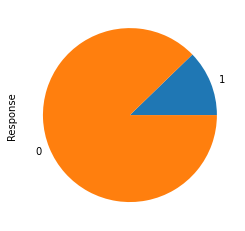

In [ ]:
df.Response.value_counts(normalize=True).sort_values().plot(kind = 'pie')
#1 is true
#0 is false

Karena tidak seimbang antara class dependent/Respond 'Mau' dan 'Tidak Mau', maka sebaiknya kita seimbangkan sebelum memasukkan dalam proses training dan testing. <br> 
karena jika tidak, maka bisa saja akan bias dalam prediksinya, akurasinya juga bisa bias karena yang di training dan testing kebanyakan 'tidak mau'.

In [ ]:
mau = df[df['Response'] == 1]
mau10k = mau.head(20000)
mau10k

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
7,8,Female,56,1,28.0,0,1-2 Year,Yes,32031.0,26.0,72,1
10,11,Female,47,1,35.0,0,1-2 Year,Yes,47576.0,124.0,46,1
15,16,Male,37,1,6.0,0,1-2 Year,Yes,2630.0,156.0,147,1
...,...,...,...,...,...,...,...,...,...,...,...,...
163267,163268,Female,72,1,28.0,0,> 2 Years,Yes,48781.0,26.0,32,1
163274,163275,Male,50,1,28.0,0,1-2 Year,Yes,35125.0,122.0,80,1
163290,163291,Female,35,1,28.0,0,1-2 Year,Yes,2630.0,154.0,35,1
163295,163296,Female,46,1,28.0,0,1-2 Year,Yes,33550.0,157.0,162,1


In [ ]:
gakmau = df[df['Response'] == 0]
gakmau10k = gakmau.head(20000)
gakmau10k

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
5,6,Female,24,1,33.0,0,< 1 Year,Yes,2630.0,160.0,176,0
6,7,Male,23,1,11.0,0,< 1 Year,Yes,23367.0,152.0,249,0
...,...,...,...,...,...,...,...,...,...,...,...,...
22831,22832,Male,58,1,28.0,0,1-2 Year,Yes,50467.0,60.0,257,0
22832,22833,Male,79,1,28.0,0,1-2 Year,No,2630.0,54.0,172,0
22833,22834,Male,23,1,8.0,1,< 1 Year,No,40135.0,152.0,185,0
22834,22835,Male,21,1,15.0,0,< 1 Year,No,41437.0,160.0,48,0


In [ ]:
print(mau10k['Response'].value_counts())
print(gakmau10k['Response'].value_counts())

1    20000
Name: Response, dtype: int64
0    20000
Name: Response, dtype: int64


In [ ]:
train = pd.concat([mau10k,gakmau10k])
train

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
7,8,Female,56,1,28.0,0,1-2 Year,Yes,32031.0,26.0,72,1
10,11,Female,47,1,35.0,0,1-2 Year,Yes,47576.0,124.0,46,1
15,16,Male,37,1,6.0,0,1-2 Year,Yes,2630.0,156.0,147,1
...,...,...,...,...,...,...,...,...,...,...,...,...
22831,22832,Male,58,1,28.0,0,1-2 Year,Yes,50467.0,60.0,257,0
22832,22833,Male,79,1,28.0,0,1-2 Year,No,2630.0,54.0,172,0
22833,22834,Male,23,1,8.0,1,< 1 Year,No,40135.0,152.0,185,0
22834,22835,Male,21,1,15.0,0,< 1 Year,No,41437.0,160.0,48,0


In [ ]:
trainX = train.drop(['id', 'Region_Code', 'Response'],axis=1)
trainX

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,Male,44,1,0,> 2 Years,Yes,40454.0,26.0,217
2,Male,47,1,0,> 2 Years,Yes,38294.0,26.0,27
7,Female,56,1,0,1-2 Year,Yes,32031.0,26.0,72
10,Female,47,1,0,1-2 Year,Yes,47576.0,124.0,46
15,Male,37,1,0,1-2 Year,Yes,2630.0,156.0,147
...,...,...,...,...,...,...,...,...,...
22831,Male,58,1,0,1-2 Year,Yes,50467.0,60.0,257
22832,Male,79,1,0,1-2 Year,No,2630.0,54.0,172
22833,Male,23,1,1,< 1 Year,No,40135.0,152.0,185
22834,Male,21,1,0,< 1 Year,No,41437.0,160.0,48


In [ ]:
label = train['Response']
label

0        1
2        1
7        1
10       1
15       1
        ..
22831    0
22832    0
22833    0
22834    0
22835    0
Name: Response, Length: 40000, dtype: int64

seperti yang bisa dilihat diatas, class dependent/respond nya masih 1 sebanyak 10000 lalu 0 sebanyak 10000. <br>
akan kita preprocess lalu randomkan selanjutnya

In [ ]:
# encode categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
trainX['Gender'] = labelencoder_X.fit_transform(trainX['Gender']) #Encoder gender, hanya saja pakai iloc
trainX['Vehicle_Age'] = labelencoder_X.fit_transform(trainX['Vehicle_Age']) #encoder Vehicle age
trainX['Vehicle_Damage'] = labelencoder_X.fit_transform(trainX['Vehicle_Damage']) #encoder vehicle damage

#minmax scaling untuk Age, Annual_Premium,'Policy_sales Channel
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(1, 5))
trainX[['Age','Annual_Premium','Policy_Sales_Channel','Vintage']] = scaler.fit_transform(trainX[['Age','Annual_Premium','Policy_Sales_Channel','Vintage']])

#Split dataset menjadi training set and test set
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(trainX, label, test_size=0.2, random_state=1) # 80% training and 20% test

See dataset after preprocessing

In [ ]:
X_test

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
31237,1,2.1250,1,0,0,1,1.000000,1.617284,1.844291
104678,1,2.6250,1,0,2,1,1.281321,1.617284,4.889273
122757,1,2.0625,1,0,0,1,1.000000,4.827160,4.487889
19166,0,2.3750,1,1,0,0,1.202658,4.061728,4.017301
74496,0,3.1875,1,0,0,1,1.000000,4.037037,4.003460
...,...,...,...,...,...,...,...,...,...
11715,1,1.1875,1,1,1,0,1.235326,4.925926,1.456747
639,1,1.1875,1,1,1,0,1.233853,4.728395,4.086505
310,0,2.5625,1,0,2,1,1.530563,4.851852,2.051903
81697,1,3.8750,1,0,2,1,1.234321,1.617284,3.795848


In [ ]:
y_test

31237     1
104678    1
122757    1
19166     0
74496     1
         ..
11715     0
639       0
310       0
81697     1
13904     0
Name: Response, Length: 8000, dtype: int64

Sudah terandom dengan baik

In [ ]:
y_train

1970      0
127318    1
9959      0
1661      1
19047     0
         ..
63775     1
14272     0
42382     1
98815     1
14823     0
Name: Response, Length: 32000, dtype: int64

In [ ]:
y_train.value_counts()

0    16033
1    15967
Name: Response, dtype: int64

data untuk di training sudah terlihat seimbang meskipun di random split

https://towardsdatascience.com/how-to-find-the-optimal-value-of-k-in-knn-35d936e554eb#:~:text=The%20optimal%20K%20value%20usually,be%20aware%20of%20the%20outliers . <br>
Link referensi untuk hampir semua code dibawah

Maximum accuracy: 0.787375 at K = 39


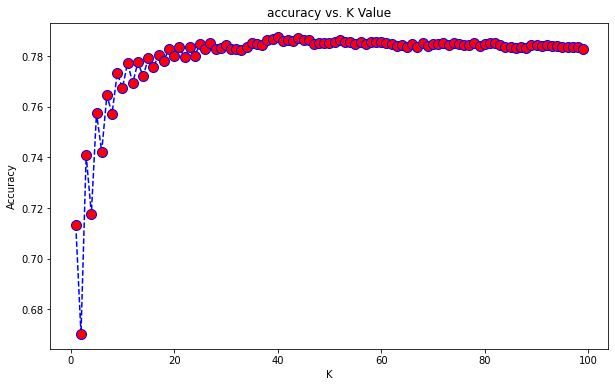

In [ ]:
acc = []
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn import metrics
for i in range(1,100):
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train.values.ravel()) #Pake values.ravel() karena ada warning error kalau tidak dipakai
    yhat = knn.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,100),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:",max(acc),"at K =",acc.index(max(acc)))

model = KNeighborsClassifier(n_neighbors =acc.index(max(acc)) ).fit(X_train,y_train.values.ravel())

In [ ]:
#@title Double click Untuk melihat code.<br> Apabila sudah yakin, jalankan form ini dengan ctrl+enter { display-mode: "form" }

Gender = 'Male' #@param ["Male", "Female"]
Age = 30 #@param {type:"slider", min:5, max:100, step:1}
Driving_License = True #@param {type:"boolean"}
Previously_Insured = True #@param {type:"boolean"}
Vehicle_Age = '1-2 year' #@param ["<1 year", "1-2 year", ">2 years"]
Vehicle_Damage = True #@param {type:"boolean"}
Annual_Premium =  20000#@param {type:"number"}
Policy_Sales_Channel = 20 #@param {type:"slider", min:1, max:164, step:1}
Vintage = 10 #@param {type:"slider", min:10, max:299, step:1}


#Pre-process inputan user
#Data setelah preprocess punya '_' setelah nama

#Label Encoder Manual
if Gender=="Male": #sudah dicek, labelencoder akan mengeluarkan 1 jika male
    Gender_=1
else:
    Gender_=0

if Driving_License: #Jika punya=1
    Driving_License_=1
else:
    Driving_License_=0

if Previously_Insured:
    Previously_Insured_=1
else:
    Previously_Insured_=0

if Vehicle_Age==">2 years": #sudah dicek, jika >2 -> 2
    Vehicle_Age_=2
elif Vehicle_Age=="<1 year": #sudah dicek, jika <1 -> 1
    Vehicle_Age_=1
else:
    Vehicle_Age_=0

if Vehicle_Damage:
    Vehicle_Damage_=1
else:
    Vehicle_Damage_=0
  

#Minmax manual
#df adalah data sebelum di preprocess
#X adalah data setelah di preprocess 
# rumus fungsi linier untuk preprocess dengan hasilnya range 1-5
#5-1 dari range 1-5
#1 dari range 1-5, *minnya 1

Age_ = (((Age-min(df['Age'])) / (max(df['Age'])-min(df['Age']))) * (5-1)) + 1
Annual_Premium_ = (((Annual_Premium-min(df['Annual_Premium'])) / (max(df['Annual_Premium'])-min(df['Annual_Premium']))) * (5-1)) + 1
Policy_Sales_Channel_ = (((Policy_Sales_Channel-min(df['Policy_Sales_Channel'])) / (max(df['Policy_Sales_Channel'])-min(df['Policy_Sales_Channel']))) * (5-1)) + 1
Vintage_ = (((Vintage-min(df['Vintage'])) / (max(df['Vintage'])-min(df['Vintage']))) * (5-1)) + 1


k = model.predict([[Gender_,Age_,Driving_License_,Previously_Insured_,Vehicle_Age_,Vehicle_Damage_,Annual_Premium_,Policy_Sales_Channel_,Vintage_]])
k[0]
if k[0]==0:
  print("Berdasarkan Data yang Anda Masukkan, Model kami memprediksi bahwa customer akan '\033[1mmenolak' tawaran asuransi mobil")
else :
  print("Berdasarkan Data yang Anda Masukkan, Model kami memprediksi bahwa customer akan '\033[1mmenerima' tawaran asuransi mobil")

Berdasarkan Data yang Anda Masukkan, Model kami memprediksi bahwa customer akan 'menerima' tawaran asuransi mobil


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
